<a href="https://colab.research.google.com/github/ancarvalho/Codenation_AceleraDEV/blob/test/week_3/week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Challenge
- Calculate mode, average, median and standard-deviation between the states

In [2]:
desafio = pd.read_csv("https://raw.githubusercontent.com/ancarvalho/Codenation_AceleraDEV/test/week_3/desafio1.csv")
desafio.head()

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


In [3]:
desc = desafio.groupby("estado_residencia")["pontuacao_credito"].describe()[["mean", "std", "50%"]] #filter for only the columns of intrest
desc = desc.rename_axis(None, axis = 0) #remove the index name

In [4]:
states = desafio["estado_residencia"].unique() #filter by the unique states name
mode_states = {} # dict with mode of states
for word in states:
    mode = desafio['pontuacao_credito'][desafio["estado_residencia"] == word]
    mode_states[word] = mode.mode()[0]
moda = pd.Series(mode_states, name="moda") # create a pandas series to concat with desc dataframe

In [5]:
desc = pd.concat([desc, moda], axis=1).rename(columns={"mean":"media",
                                               "std":"desvio_padrao",
                                               "50%":"mediana"})

In [6]:
desc = desc[["moda", "mediana", "media", "desvio_padrao"]].T
desc = desc[["SC", "RS", "PR"]]
desc.to_json("submission.json")

In [7]:
submission = pd.read_json("https://raw.githubusercontent.com/ancarvalho/Codenation_AceleraDEV/test/week_3/submission_model.json") #to se the pattern of table
submission

,SC,RS,PR
moda,0,0,0
mediana,0,0,0
media,0,0,0
desvio_padrao,0,0,0


## Data Visualization
- visualize correlation between the data

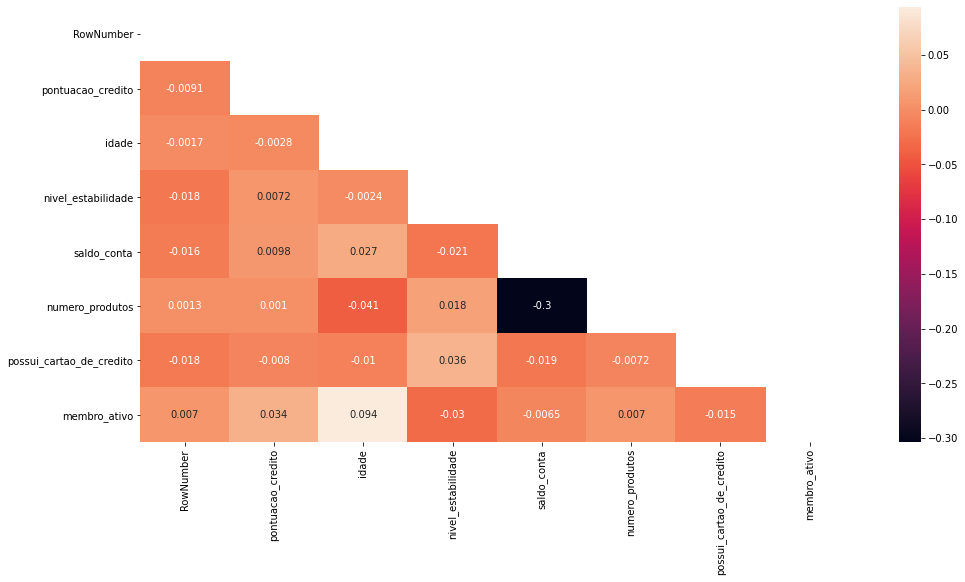

In [8]:
plt.figure(figsize=(16,8))
corr = desafio.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,
            annot=True,
            mask=mask) # any relevant correlation

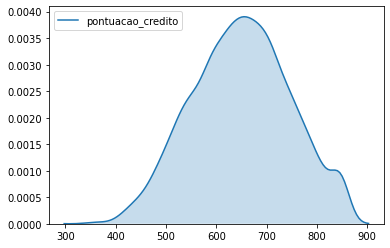

In [9]:
sns.kdeplot(desafio["pontuacao_credito"], shade=True)

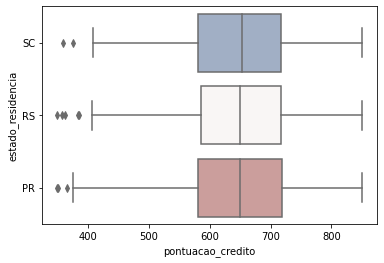

In [10]:
sns.boxplot(x="pontuacao_credito", y="estado_residencia", data=desafio, palette="vlag")

In [11]:
def plot_kde(df, col_cat, col_num):
  list = df[col_cat].unique()
  plt.title(col_num.replace("_", " de ").title())
  for elem in list:
    sns.kdeplot(df[col_num][df[col_cat] == elem], label=elem) #function to improve code plot

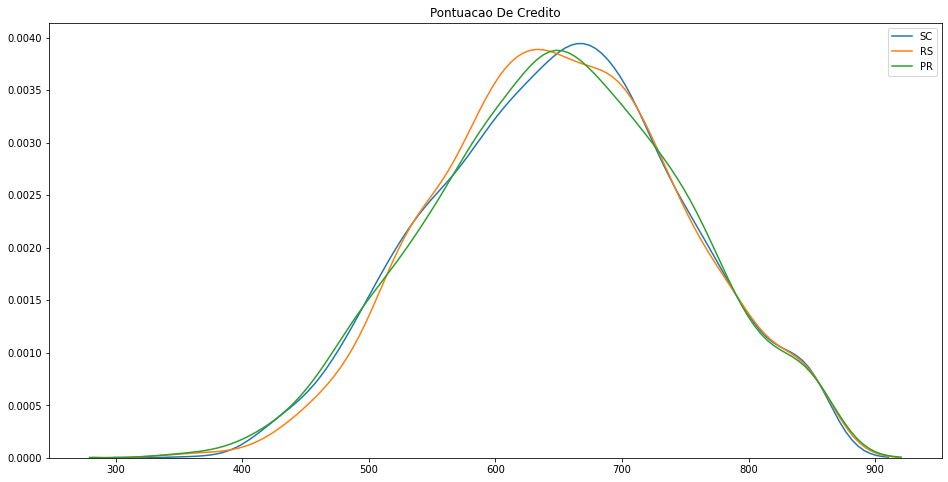

In [12]:
plt.figure(figsize=(16,8))
plot_kde(desafio, "estado_residencia", "pontuacao_credito")

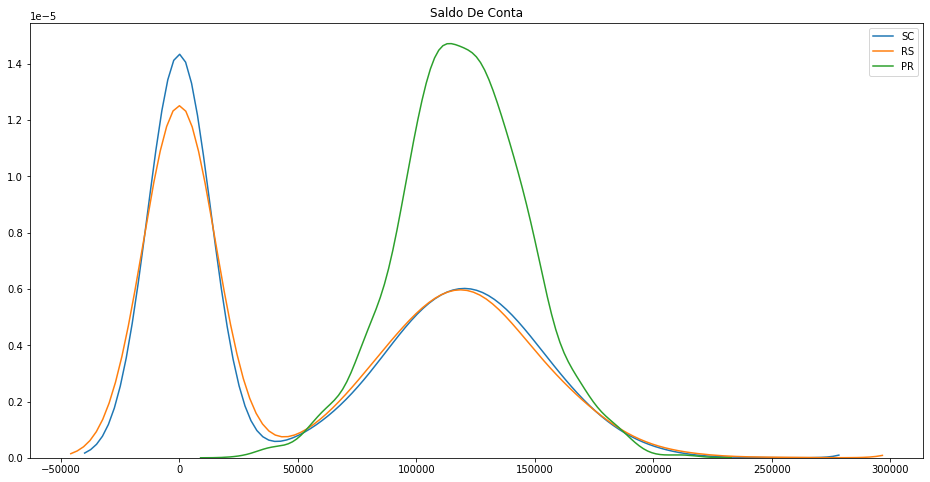

In [13]:
plt.figure(figsize=(16,8))
plot_kde(desafio, "estado_residencia", "saldo_conta")

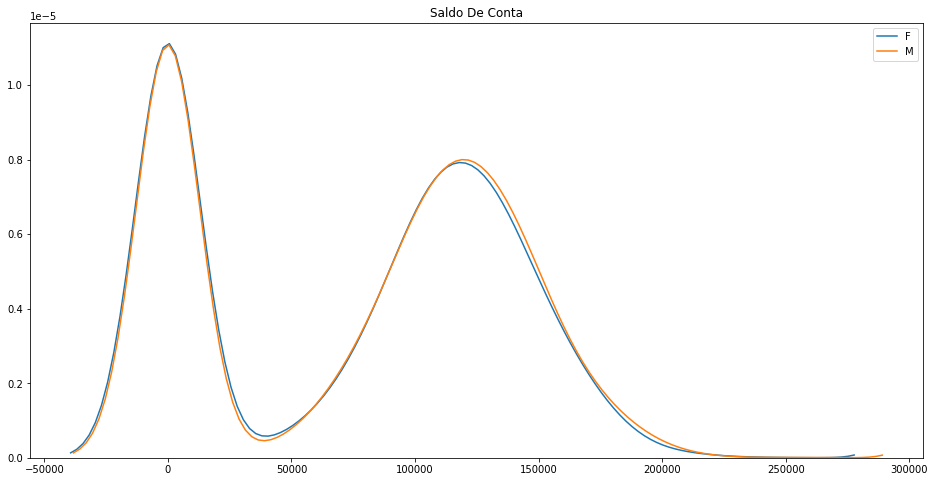

In [14]:
plt.figure(figsize=(16,8))
plot_kde(desafio, "genero", "saldo_conta")

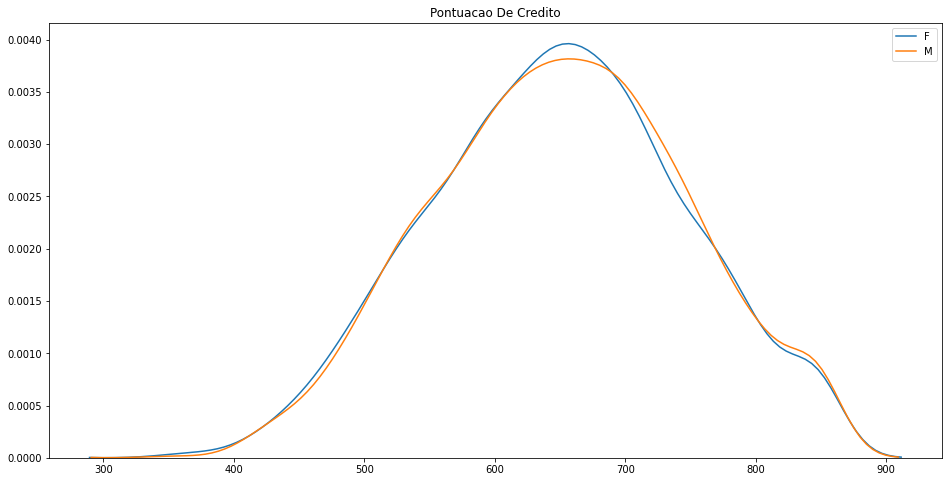

In [15]:
plt.figure(figsize=(16,8))
plot_kde(desafio, "genero", "pontuacao_credito")

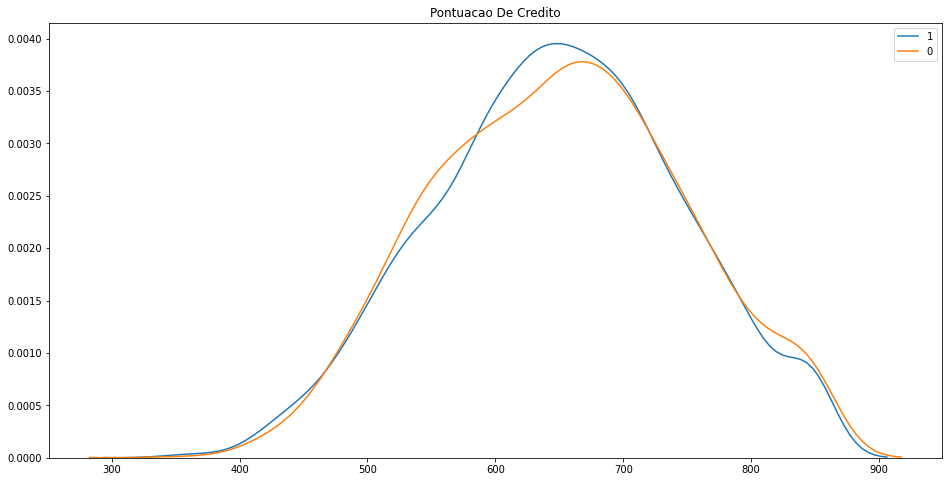

In [16]:
plt.figure(figsize=(16,8))
plot_kde(desafio, "possui_cartao_de_credito", "pontuacao_credito")

In [17]:
desafio['age_bins'] = pd.cut(x=desafio['idade'], bins=[18, 34, 50, 69, 92], labels=["Millennials", "Gen X", "Baby Boomers", "Silent generation"]) #dividing the ages in groups

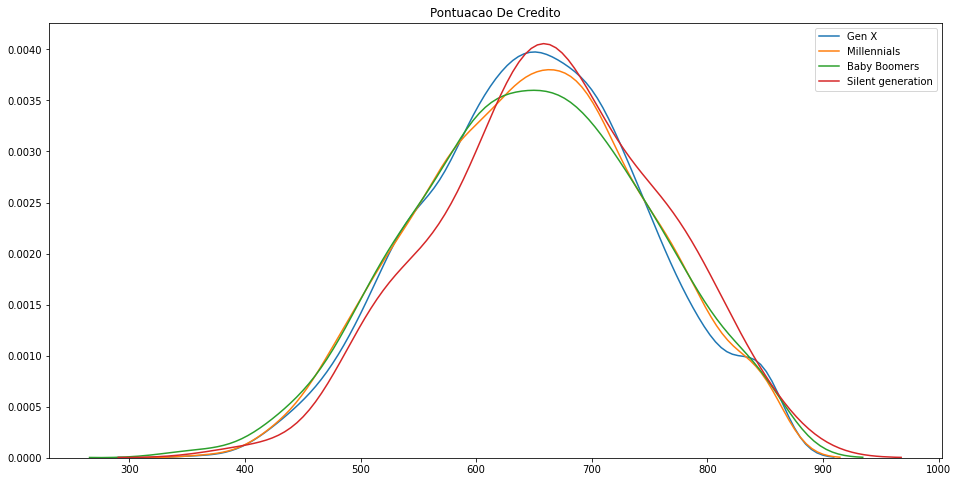

In [18]:
plt.figure(figsize=(16,8))
plot_kde(desafio, 'age_bins', "pontuacao_credito")

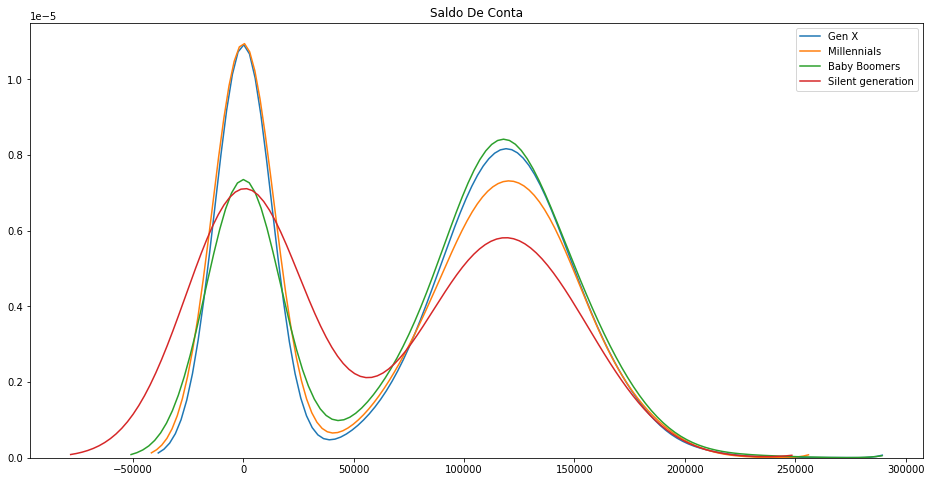

In [19]:
plt.figure(figsize=(16,8))
plot_kde(desafio, 'age_bins', "saldo_conta")